## Introduction to OOP in Python, Part 1
An Object is a type of data structure that contains both attributes (or properties) and methods - essentially functions that act upon the object's attributes. Attributes themselves can be other objects of the same or different class. A class definition is basically the template for object's attributes and methods. A specific object is said to be an instance of its class.

The task we will set ourselves is to build Python classes that enable us to represent algebraic expression trees, for example, $ ((5 + z) / -8) * (4 ^ 2) $ is represented as: 

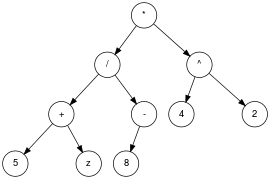

From Wikipedia : https://en.wikipedia.org/wiki/Binary_expression_tree

We may go on to see how we can use such trees for *Evolutionary Computing* in later tutorial set.

In [1]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    def __init__(self,name,parent=None):
        self.name = name
        self.left = None
        self.right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self.myValue = 42

    def value(self): #an example method that doesn't really do much!
        return self.myValue


Function names that begin and end with double underscore are used by Python to define a *protocol*<sup>1</sup>;
in this case `__init__` is part of the class protocol and defines how a specific instance of the new
class will be initialized, and is called automatically when you use a statement like:

```python
myTN = TreeNode('My name is Joe')`
```
    
The first argument, conventionally called 'self', refers to the specific instance of the object, and is required for all instance methods; it is automatically filled-in when methods are called using 'dot' notation:

```python
myTN.value()
```

Notice that the multi-line comment following the class definition will become the class's "Doc-String".

Instances of above class have five properties: **name, left, right, parent** and **myValue**. We may also think of instances of the class as *containing* these five objects.

The instances also has one *user* method: `value()` and one *internal* method: `__init__()`

1: Object oriented languages such as **Java** use the concept of *Interfaces* that define attributes and methods that *must* be implemented; **Python** is less formal in that you define only what you need.

In [2]:
?TreeNode

Init signature: TreeNode(name, parent=None)
Docstring:     
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    
Type:           type
Subclasses:     


In [3]:
#let's try our new class
nd1 = TreeNode('Root')
nd1.left = TreeNode('left')
nd1.right = TreeNode('right')
print(nd1)

Not particularly useful! Let's fix that.
`__str__` is the protocol for defining how an object will print or be represented as a string.
Let's redefine our class...

In [4]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    def __init__(self,name,parent=None):
        self.name = name
        self.left = None
        self.right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self.myValue = 42

    def value(self): #an example method that doesn't really do much!
        return self.myValue
    
    def __str__(self):
        s = self.name
        if self.left and self.right:
            return s+'['+str(self.left)+','+str(self.right)+']'
        if self.left:
            return s+'['+str(self.left)+']'
        if self.right:
            return s+'['+str(self.right)+']'
        return s


Notice that we are using `__str__` recursively as as the `str` function calls `__str__` -- we we frequently make use of recursive functions when dealing with trees

In [5]:
nd1 = TreeNode('Root')
nd1.left = TreeNode('left')
nd1.right = TreeNode('right')
print(nd1)

Root[left,right]


The `value` method is really acting as an alias for the `myValue` property, it would be nice if we could just access it like any other property. We can do this with the `@property` decorator. A decorator is a function that modifies the behaviour of the method or function that follows it. In this case it allow us to access the `value` method as if it was a property rather than a method, e.g. `nd1.value` instead of `nd1.value()`

In [6]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    def __init__(self,name,parent=None):
        self.name = name
        self.left = None
        self.right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self.myValue = 42

    @property
    def value(self): #an example method that doesn't really do much!
        return self.myValue
    
    def __str__(self):
        s = self.name
        if self.left and self.right:
            return s+'['+str(self.left)+','+str(self.right)+']'
        if self.left:
            return s+'['+str(self.left)+']'
        if self.right:
            return s+'['+str(self.right)+']'
        return s


In [7]:
nd1 = TreeNode('Root')
nd1.left = TreeNode('left')
nd1.right = TreeNode('right')
print(nd1)
nd1.value = 'albertross'

Root[left,right]


AttributeError: can't set attribute

Property methods are useful for properties that are calculated 'on-the-fly'; we will see later that they can also be used for data validation.

Notice that we are unable to assign a value using the name.

We will see how to overcome this later.

Although we can still use `myValue`

In [8]:
nd1.myValue = 'albertross'
print('Value: ',nd1.value)

Value:  albertross


Unlike C++ or Java, Python does not strongly enforce the OOP concept of private or public attributes and methods, however, the naming convention is that attributes and methods whose name starts with underscore are _protected_, and those starting with double-underscore are _private_.

The bevaviour of private properties may seem rather peculiar!

In [9]:
class Test:
    
    def __init__(self):
        self.__private = "Don't change me"
        
tst = Test()

tst.__private

AttributeError: 'Test' object has no attribute '__private'

Yes it is private, we can't access it, but..

In [10]:
tst.__private = "I have changed"

tst.__private

'I have changed'

In [11]:
tst._Test__private

"Don't change me"

Let's see what's going on..? The `dir` function will list an object's properties and methods (including those inherited from the superclass<sup>2</sup>)

2: Explained more fully later.

In [12]:
dir(tst)

['_Test__private',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__private',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

This is an example of Python's _name mangling_, in this case it is being used to hide the private property. The upshot is that you don't really want to mess with private properties.

The fact that in Python you can create a new property on-the-fly outside of the class definition (also works for methods) is called _Monkey Patching_.

Now let us see how can modify the value property so that we can update it.

In [13]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    def __init__(self,name,parent=None):
        self.name = name
        self.left = None
        self.right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self._value = 42 #we've made this protected now

    @property
    def value(self): #an example method that doesn't really do much!
        return self._value
    
    @value.setter
    def value(self, newvalue):
        #now we introduce some data validation...
        if isinstance(newvalue, (int, float)) and not isinstance(newvalue, bool):
            self._value = newvalue
        else:
            raise TypeError("'value' must be numeric!")
    
    def __str__(self):
        s = self.name
        if self.left and self.right:
            return s+'['+str(self.left)+','+str(self.right)+']'
        if self.left:
            return s+'['+str(self.left)+']'
        if self.right:
            return s+'['+str(self.right)+']'
        return s


In [14]:
node = TreeNode('Test')
node.value = 'JustDoIt'

TypeError: 'value' must be numeric!

In [15]:
node = TreeNode('Test')
node.value = 3.14159

Notice that by using the setter decorator we have been able to include some validation on the input - in this case the input type must be numeric.

Perhaps a more useful use of the setter decorator is to enforce a *side effect*. Consider the need to set the parent property, currently we might do something like:

```python
p = TreeNode('P')
p.left = TreeNode('LC')
p.left.parent = p
```
    
although we can shorten this to:

```python
p = TreeNode('P')
p.left = TreeNode('LC',p)
```
    
It is possible that the user may forget to set the parent property. We can fix this as follows:

In [16]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    def __init__(self,name,parent=None):
        self.name = name
        self._left = None
        self._right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self._value = 42 #we've made this protected now
        
    @property
    def left(self):
        return self._left
    
    @left.setter
    def left(self,child):
        self._left = child
        if child is None:
            return
        child.parent = self
        
    @property
    def right(self):
        return self._right
    
    @right.setter
    def right(self,child):
        self._right = child
        if child is None:
            return
        child.parent = self

    @property
    def value(self): #an example method that doesn't really do much!
        return self._value
    
    @value.setter
    def value(self, newvalue):
        #now we introduce some data validation...
        if isinstance(newvalue, (int, float)) and not isinstance(newvalue, bool):
            self._value = newvalue
        else:
            raise TypeError("'value' must be numeric!")
    
    def __str__(self):
        s = self.name
        if self.left and self.right:
            return s+'['+str(self.left)+','+str(self.right)+']'
        if self.left:
            return s+'['+str(self.left)+']'
        if self.right:
            return s+'['+str(self.right)+']'
        return s


In [17]:
p = TreeNode('P')
p.left = TreeNode('C')
p.left.parent is p

True

### Aside: Graphviz, a package for plot graph structures

install: *conda install python-graphviz* or use analogous pip command.

In [18]:
from graphviz import Digraph

dot = Digraph()
dot.node('A',shape='box',fillcolor='yellow',style='filled')
dot.node('B')
dot.node('C')
dot.edge('A','B')
dot.edge('A','C')
dot.edge('B','C')
dot.edge('C','C')

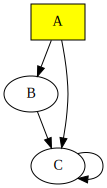

In [19]:
dot

## Leveraging GraphViz to render our custom trees

Notice that GraphViz uses the _name_ as a unique identifier; we will therefore implement a unique identifier for each node. We will use a _class property_ to keep track of the UIDs created. Similarly, we can have `@classmethod` which we have used to fetch the next UID. Notice that the class method's first parameter is `cls` rather than `self` - it is a reference to this class rather than a specific instance.

We generate the graph to be plotted using a recursive helper function which for illustration has been defined as a `@staticmethod`. A static method is one that does not depend on the instance i.e. it does not require `_self_`. In this case we could have just used a normal method...

Code adapted from: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

In [20]:
class TreeNode:
    """
Using a binary tree structure as an example; where a tree is composed of nodes that may have zero, one or two child nodes.
the class represents one node of the tree.
    """
    
    
    nextUID = 1
    
    @classmethod
    def getUID(cls):
        uid = cls.nextUID
        cls.nextUID += 1
        return uid
        
    
    def __init__(self,name,parent=None):
        self.name = name
        self.left = None
        self.right = None
        self.parent = parent #we keep track of the parent node so that we can traverse the tree in reverse
        self._value = 42 #we've made this protected now
        self._uid = str(TreeNode.getUID())

        
    @property
    def left(self):
        return self._left
    
    @left.setter
    def left(self,child):
        self._left = child
        if child is None:
            return
        child.parent = self
        
    @property
    def right(self):
        return self._right
    
    @right.setter
    def right(self,child):
        self._right = child
        if child is None:
            return
        child.parent = self
        
    @property
    def value(self): #an example method that doesn't really do much!
        return self._value
    
    @value.setter
    def value(self, newvalue):
        #now we introduce some data validation...
        if isinstance(newvalue, (int, float)) and not isinstance(newvalue, bool):
            self._value = newvalue
        else:
            raise TypeError("'value' must be numeric!")
            
    @staticmethod
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=tree._uid, label=tree.name,style='filled',fillcolor='yellow')

        # Add nodes
        if tree.left:
            dot.node(name=tree.left._uid, label=tree.left.name)
            dot.edge(tree._uid, tree.left._uid)
            dot = tree.add_nodes_edges(tree.left, dot=dot)

        if tree.right:
            dot.node(name=tree.right._uid ,label=tree.right.name)
            dot.edge(tree._uid, tree.right._uid)
            dot = tree.add_nodes_edges(tree.right, dot=dot)

        return dot
    
    def plot(self):
        # Add nodes recursively and create a list of edges
        dot = TreeNode.add_nodes_edges(self)
        return dot
    
    def __str__(self):
        s = self.name
        if self.left and self.right:
            return s+'['+str(self.left)+','+str(self.right)+']'
        if self.left:
            return s+'['+str(self.left)+']'
        if self.right:
            return s+'['+str(self.right)+']'
        return s


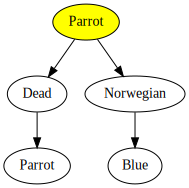

In [21]:
nd1 = TreeNode('Parrot')
nd1.left = TreeNode('Dead')
nd1.right = TreeNode('Norwegian')
nd1.right.right = TreeNode('Blue')
nd1.left.right = TreeNode('Parrot')
nd1.plot()

We access class properties using either instance, or perhaps more clearly, using the class:

In [22]:
nd1.nextUID

6

In [23]:
TreeNode.nextUID

6

For simplicity, we draw the links as single arrows, although in reality they should be double arrows because of the link from *child* to *parent* via the `parent` property.

## To be continued...